# Image Generation With Stable Diffusion

# Stable Diffusion
A text to image model built by an open-source organization named stability.ai

HuggingFace has a library named [diffusers](https://huggingface.co/docs/diffusers/index) for this model.

In [1]:
! pip install -q diffusers==0.10.2 transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [3]:
pipe.to("cuda:0")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.10.2",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

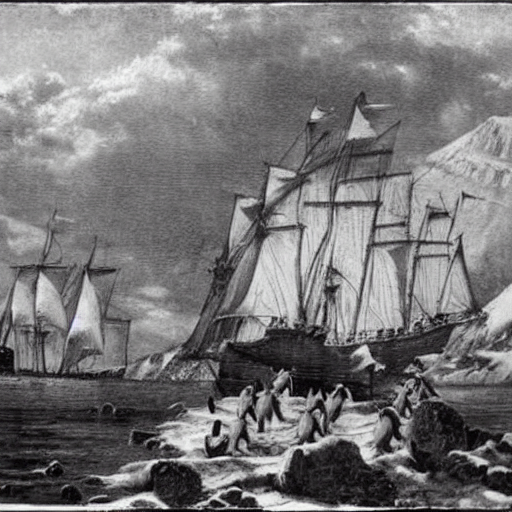

In [4]:
prompt = "a photo of crusaders conquering antarctica"
image = pipe(prompt).images[0]
image

In [5]:
image.save("crusaders.png")

## Guidance Scale

  0%|          | 0/50 [00:00<?, ?it/s]

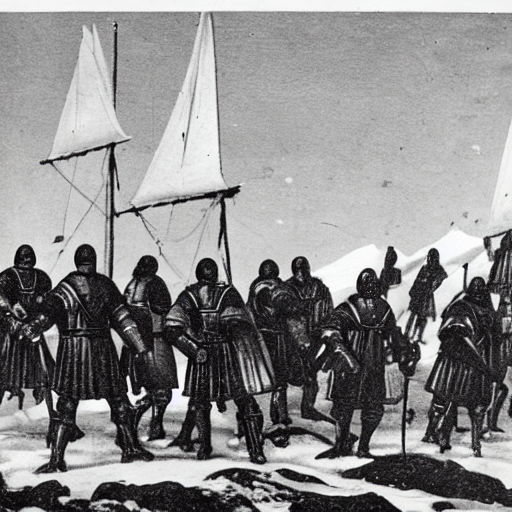

In [6]:
# Adding Guidance Scale
image = pipe(prompt, guidance_scale=8).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

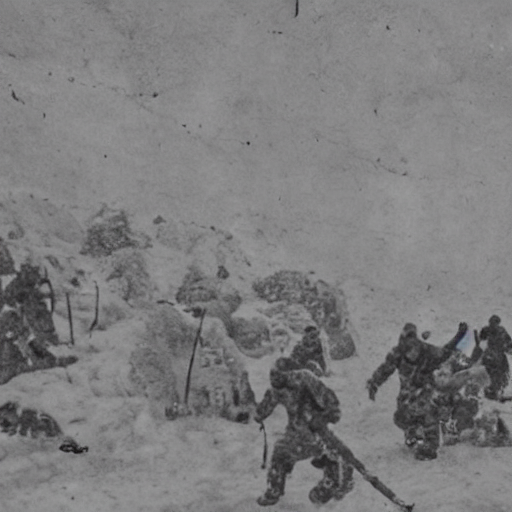

In [7]:
image = pipe(prompt, guidance_scale=3).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

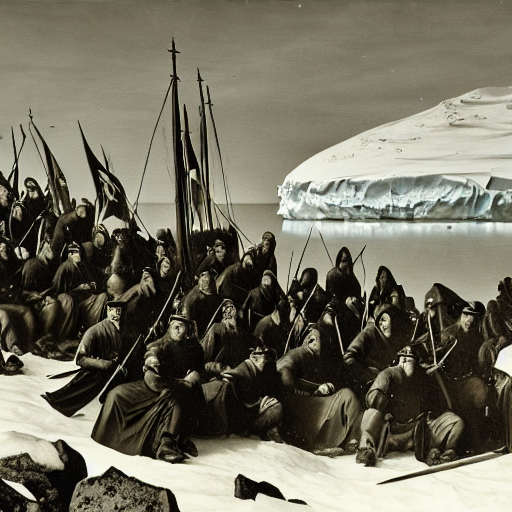

In [8]:
image = pipe(prompt, guidance_scale=12).images[0]
image

  0%|          | 0/15 [00:00<?, ?it/s]

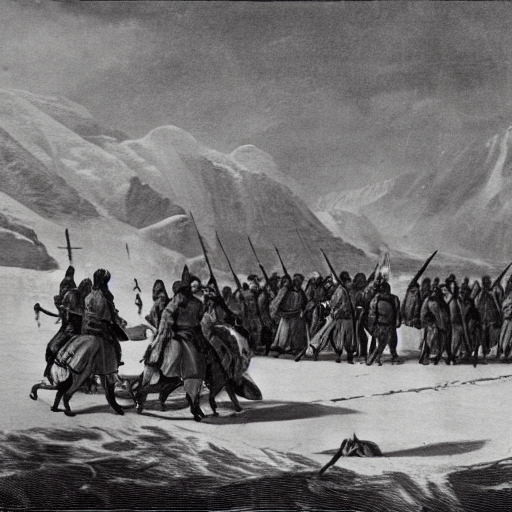

In [9]:
# Decrease Inference Steps
image = pipe(prompt, guidance_scale=8, num_inference_steps=15).images[0]
image

## Negative Prompt

  0%|          | 0/50 [00:00<?, ?it/s]

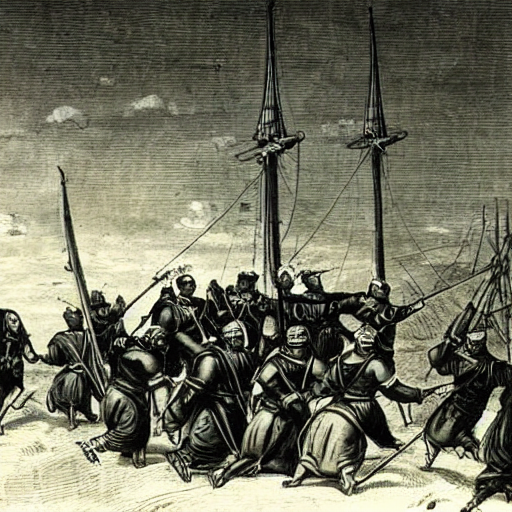

In [10]:
prompt = "a photo of crusaders conquering antarctica"
image = pipe(prompt, negative_prompt="ice").images[0]
image

## Image Guiding

In [11]:
torch.cuda.empty_cache()

In [12]:
from diffusers import StableDiffusionImg2ImgPipeline
pipei2i = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                                         revision='fp16',
                                                         torch_dtype=torch.float16)
pipei2i.to("cuda:0")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.10.2",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

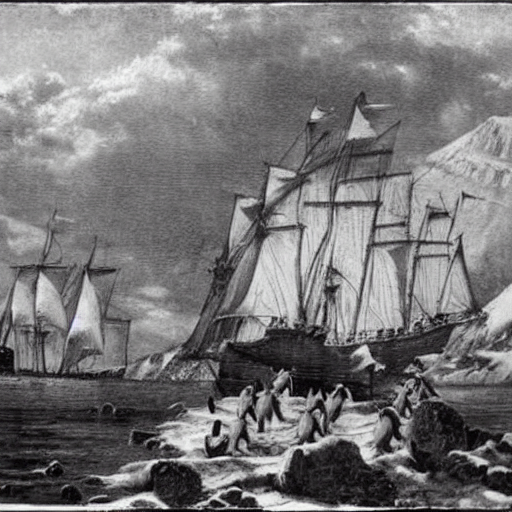

In [13]:
from PIL import Image
image = Image.open("crusaders.png").convert("RGB")
image

  0%|          | 0/80 [00:00<?, ?it/s]

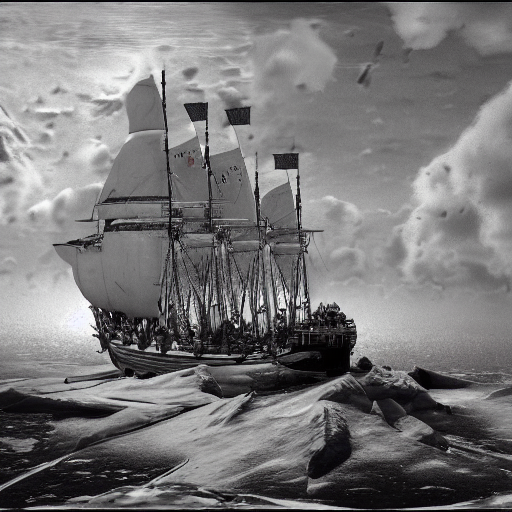

In [14]:
prompt = "a photo of crusaders conquering antarctica, photorealistic, 4K"
image = pipei2i(prompt=prompt, image=image, num_inference_steps=100).images[0]
image

Stable Diffusion 2.1: https://huggingface.co/stabilityai/stable-diffusion-2-1

Get Good Prompt Guide: https://lexica.art/